# Demo on benchmark functions

In [1]:
import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')

import matplotlib.pyplot as plt

from bayes_opt import BayesOpt_KnownOptimumValue,BayesOpt
import numpy as np
from bayes_opt import vis_ERM,functions
import warnings

warnings.filterwarnings("ignore")


# Specify the test function

In [2]:
# select the function to be optimized
#myfunction=functions.branin(sd=0)
myfunction=functions.hartman_3d()
#myfunction=functions.hartman_6d()
#myfunction=functions.ackley(input_dim=5)
#myfunction=functions.gSobol(a=np.array([1,1,1,1,1]))
#myfunction=functions.gSobol(a=np.array([1,1,1,1,1,1,1,1,1,1]))


func=myfunction.func

# Print the black-box function

In [3]:
# myfunction.func: contains the black-box function
print(myfunction.func)

print("f([0,0,0])=",myfunction.func([0,0,0]))
print("f([1,1,1])=",myfunction.func([1,1,1]))


# myfunction.bounds: contains the SearchSpace
print("Search space:",myfunction.bounds)

# myfunction.fstar: contains the known optimum value
print("f* known optimum value is ", myfunction.fstar)


<bound method hartman_3d.func of <bayes_opt.functions.hartman_3d object at 0x0000025F52334198>>
f([0,0,0])= [[0.06797412]]
f([1,1,1])= [[0.30047607]]
Search space: [(0, 1), (0, 1), (0, 1)]
f* known optimum value is  3.86278


# Specify the acquisition function

In [4]:
#acq_name='ei'
#acq_name='ucb'
acq_name='erm'
#acq_name='cbm'
#acq_name='kov_ei'

# Specify the surrogate model either tgp or gp

In [5]:
#IsTGP=0 # using vanilla GP 
IsTGP=1 # using Transformed GP 

# Set up the BO class

In [6]:
if 'kov' in acq_name or acq_name == 'erm' or acq_name == 'cbm':
    bo=BayesOpt_KnownOptimumValue(myfunction.func,myfunction.bounds,fstar=myfunction.fstar, \
                              acq_name=acq_name,IsTGP=1,verbose=0)
else:
    bo=BayesOpt(myfunction.func,myfunction.bounds,acq_name=acq_name,verbose=0)
            
if IsTGP==1: 
    print("using transform GP with the known optimum value")
else:
    print("using vanilla GP without the known optimum value")

using transform GP with the known optimum value


# Initialize BO using 3*dim number of observations

In [7]:
bo.init(n_init_points=3*myfunction.input_dim)

# Run for 10*dim iterations

# Plot the performance

Text(0.5, 1.0, 'Performance')

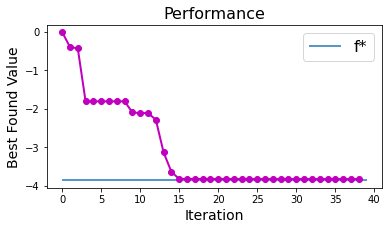

In [9]:
fig=plt.figure(figsize=(6, 3))
myYbest=[bo.Y_ori[:idx+1].max()* myfunction.ismax for idx,val in enumerate(bo.Y_ori)]
plt.plot(range(len(myYbest)),myYbest,linewidth=2,color='m',linestyle='-',marker='o')
if myfunction.ismax==1:
    plt.hlines(y=myfunction.fstar,xmin=0,xmax=len(myYbest),label='f*')
else:
    plt.hlines(y=-myfunction.fstar,xmin=0,xmax=len(myYbest),label='f*')

plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Best Found Value',fontsize=14)
plt.legend(prop={'size': 16})
plt.title('Performance',fontsize=16)